In [1]:
%run "../../../common/0_notebooks_base_setup.py"   

/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles, que usaremos para resolver ejercicios de Numpy, Estadística y Probabilidad.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [5]:
## [BORRAR_PRESENCIAL]

import numpy as np

# local:
data_location = '../Data/sales_data_sample_excercise.csv'

data = np.genfromtxt(data_location, delimiter='\t', skip_header=1,dtype=str)

In [6]:
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

In [8]:
sales_vector_str = data[:, 1]
sales_vector =  sales_vector_str.astype(np.float)
print(sales_vector)

country_vector = data[:, 5]
print(country_vector)

[2871.   2765.9  3884.34 ... 5417.57 2116.16 3079.44]
['USA' 'France' 'France' ... 'Spain' 'France' 'USA']


C:\Users\jaayg\AppData\Local\Temp\ipykernel_14240\3579048057.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sales_vector =  sales_vector_str.astype(np.float)


## Ejercicio 2

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución normal.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [9]:
ventas_USA_mask = country_vector == 'USA'
precios_USA = sales_vector[ventas_USA_mask]

In [11]:
np.mean(precios_USA), np.median(precios_USA), np.max(precios_USA) - np.min(precios_USA), np.std(precios_USA)

(3613.5287151394423, 3236.06, 13541.66, 1879.9971929724536)

In [17]:
mu,std = 3613, 1879

random_generator = np.random.default_rng()
random_normal_data = random_generator.normal(mu, std, size=100)

## Ejercicio 3

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados

Ayuda: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [13]:
np.mean(prices), np.median(prices), np.max(prices) - np.min(prices), np.std(prices)


(3754.5062502188644, 3797.586552402632, 10730.187697543433, 2069.8203254703362)

## Ejercicio 4

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución uniforme.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [14]:
random_uniform_data = random_generator.uniform(low=np.min(precios_USA), high=np.max(precios_USA), size=100)

## Ejercicio 5

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados.

In [15]:
all_USA_data_uniform = np.concatenate((precios_USA, random_uniform_data))
print("Media de precios USA:", np.around(np.mean(all_USA_data_uniform), 2))
print("Mediana de precios USA:", np.around(np.median(all_USA_data_uniform), 2))
print("Rango de precios USA:", np.around(np.max(all_USA_data_uniform) - np.min(all_USA_data_uniform), 2))
print("Desvío de precios USA:", np.around(np.std(all_USA_data_uniform), 2))

Media de precios USA: 3979.64
Mediana de precios USA: 3348.18
Rango de precios USA: 13541.66
Desvío de precios USA: 2453.22


## Ejercicio 6

¿Cuál de las dos imputaciones de datos preservó mejor la distribución original?

In [18]:
all_USA_data_normal = np.concatenate((precios_USA, random_normal_data))

In [16]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue',
                         bin_width=200):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                       color = color)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
    
    


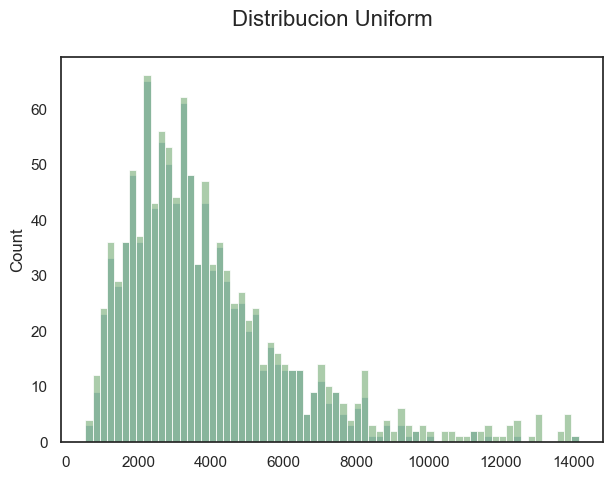

In [20]:
distribution_plotter(precios_USA, "Original")

distribution_plotter(all_USA_data_uniform, "Uniform", color= 'darkseagreen')

#

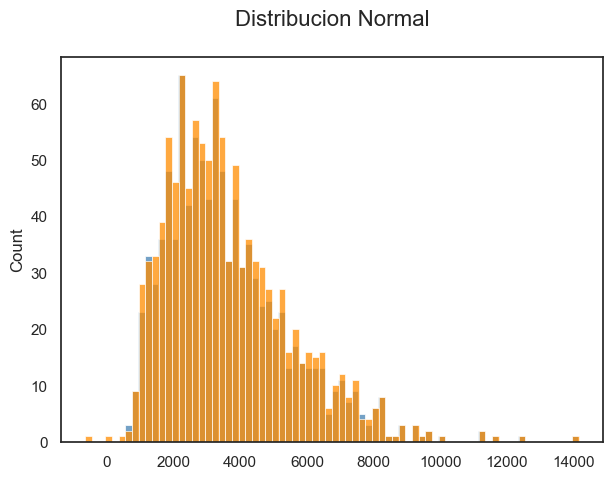

In [21]:
distribution_plotter(precios_USA, "Original")
distribution_plotter(all_USA_data_normal, "Normal", color='darkorange')

Me parece que la uniforme se acerca mas a los datos generados